### <실습 6-1> 50Hz 신호를 10000Hz 신호를 이용해서 전송

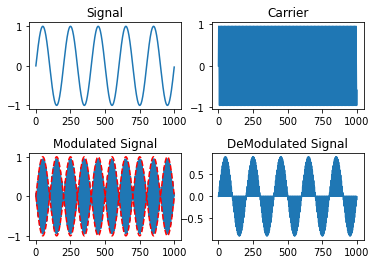

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, misc

signal_frequency = 50
carrier_frequency = 1000
num_samples = 5000
sampling_rate = 10000

# Create the sine save and noise
x = [np.sin(2 * np.pi * signal_frequency * x1/sampling_rate) for x1 in range(num_samples)]
carrier = [np.sin(2 * np.pi * carrier_frequency * x1 / sampling_rate) for x1 in range(num_samples)]

# Convert them to numpy arrays
x = np.array(x)
carrier = np.array(carrier)

# Modulation x(t)*cos(2 pi f t)
m = x * carrier

# DeModulation m(t)* cos(2 pi f t)
y = m * carrier

plt.subplot(221)
plt.title("Signal")
plt.subplots_adjust(hspace=.5)
plt.plot(x[:1000])

plt.subplot(222)
plt.title("Carrier")
plt.plot(carrier[:1000])

plt.subplot(223)
plt.title("Modulated Signal")
plt.plot(m[:1000])
plt.plot(x[:1000], 'r--')
plt.plot(-x[:1000], 'r--')

plt.subplot(224)
plt.title("DeModulated Signal")
plt.plot(y[:1000])
plt.show()


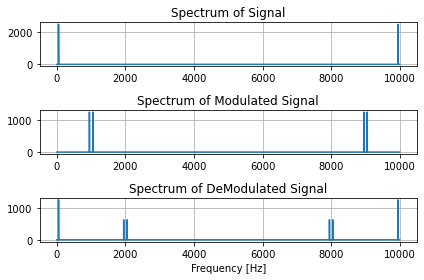

In [26]:
signal_fft = np.fft.fft(x)
m_fft = np.fft.fft(m)
y_fft = np.fft.fft(y)

length = len(signal_fft)

Mag_signal = np.abs(signal_fft)
Mag_modulated_signal = np.abs(m_fft)
Mag_demodulated_signal = np.abs(y_fft)
freq_bin = sampling_rate / length
w = np.arange(0, length)
w = w * freq_bin

plt.subplot(311)
plt.title("Spectrum of Signal")
plt.plot(w, Mag_signal), plt.grid()

plt.subplot(312) # 두개 나온 이유 - 2파이 기준으로 반복되기때문에. 2파이 밖에 있는놈들이 침범한거
plt.title("Spectrum of Modulated Signal")
plt.plot(w, Mag_modulated_signal), plt.grid()

plt.subplot(313)
plt.title("Spectrum of DeModulated Signal")
plt.plot(w, Mag_demodulated_signal)
plt.xlabel('Frequency [Hz]'), plt.grid()
plt.tight_layout()

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x207ac019b50>])

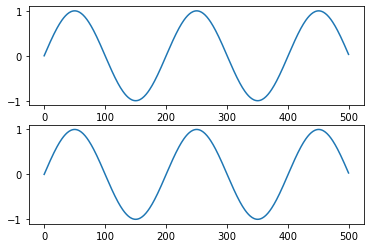

In [25]:
LPF = np.zeros(length) #Low-Pass Filtering 
for index in range(length):
    if (w[index] > 0 and w[index] < 100) or (w[index] > 9900 and w[index] < 10000):
        LPF[index] = 1 # 양쪽만 1. 그 외 0
    else:
        LPF[index] = 0

Mag = Mag_demodulated_signal * LPF
r_fft = y_fft * LPF
recovered_signal =  2* np.real(np.fft.ifft(r_fft)) # 복구

plt.subplot(211), plt.plot(x[:500])
plt.subplot(212), plt.plot(recovered_signal[:500])